In [419]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.spatial


In [426]:
eval_output1 = np.load('/Users/gus/CDIPS/fcn_eval_log/predictions_chunk_1.npy')
eval_output2 = np.load('/Users/gus/CDIPS/fcn_eval_log/predictions_chunk_2.npy')
eval_output3 = np.load('/Users/gus/CDIPS/fcn_eval_log/predictions_chunk_3.npy')
eval_output4 = np.load('/Users/gus/CDIPS/fcn_eval_log/predictions_chunk_4.npy')


In [427]:
total_output = np.concatenate((eval_output1,eval_output2,eval_output3,eval_output4))

In [428]:
total_output.shape

(16, 2, 416, 576)

In [429]:
total_output[0,0,:,:]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [430]:
def compare(idx,records=total_output):
    fig = plt.figure(figsize=(10,20))
    ax1 = fig.add_subplot(221)
    ax1.imshow(records[idx,0,:,:],cmap='Greys')
    ax2 = fig.add_subplot(222)
    ax2.imshow(records[idx,1,:,:],cmap='Greys')

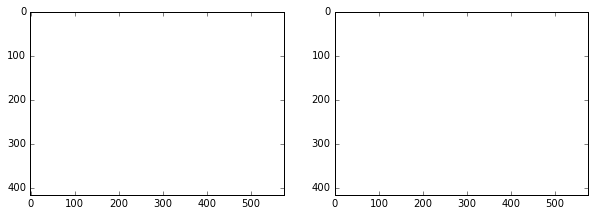

In [431]:
compare(1)

In [174]:
def find_true_empties(arr):
    arr=~arr.astype(bool)
    truth = arr[:,1,:,:]
    sums = np.sum(truth,axis=(1,2))
    empty = (sums ==0)
    return arr[empty,:,:,:]

def find_pred_empties(arr):
    arr=~arr.astype(bool)
    truth = arr[:,0,:,:]
    sums = np.sum(truth,axis=(1,2))
    empty = (sums ==0)
    return arr[empty,:,:,:]

def find_false_empties(arr):
    arr=~arr.astype(bool)
    truth = arr[:,0,:,:]
    pred = arr[:,1,:,:]
    tsums = np.sum(truth,axis=(1,2))
    psums=np.sum(pred,axis=(1,2))
    empty = (tsums !=0) & (psums==0)
    return arr[empty,:,:,:]
    
    
def find_false_nonempties(arr):
    arr=~arr.astype(bool)
    truth = arr[:,0,:,:]
    pred = arr[:,1,:,:]
    tsums = np.sum(truth,axis=(1,2))
    psums=np.sum(pred,axis=(1,2))
    empty = (tsums ==0) & (psums!=0)
    return arr[empty,:,:,:]

In [253]:
def ndice(pred_batch,label_batch,sh=(416,576)):
      n_batch = pred_batch.shape[0]
      preds = pred_batch.reshape([n_batch,sh[0],sh[1]])
      labels = label_batch.reshape([n_batch,sh[0],sh[1]])
      denoms = np.sum(preds,axis=(1,2)) + np.sum(labels,axis=(1,2))
      cap = np.logical_and(preds, labels)
      numerators = 2*np.sum(cap, axis=(1,2))
      zero_denoms = np.where(denoms ==0)
      nonzero_denoms = np.where (denoms !=0)
      result = np.empty(denoms.shape)
      result[zero_denoms] = 1
      result[nonzero_denoms] = np.divide(numerators[nonzero_denoms],denoms[nonzero_denoms])
      return result

In [432]:
sample_dice=ndice(total_output[:,0,:,:],total_output[:,1,:,:])

In [434]:
mean_dice=sample_dice.mean()

In [435]:
mean_dice

0.78202685861803101

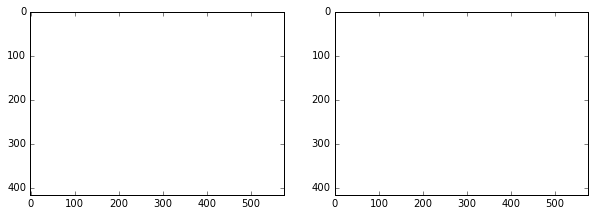

In [453]:
compare(15)

In [411]:
def convex_hull(prediction,sh=(416,576)):
    prediction=prediction.reshape(sh)
    pts=[]
    for i in range(sh[0]):
        for j in range(sh[1]):
            if prediction[i,j]==True:
                pts.append(np.array([i,j]))
    hull = scipy.spatial.ConvexHull(pts)
    result=np.zeros((416,576))
    #for p in hull:
        #result[p[0],p[1]] = 1
    #return result.astype(bool)
    return hull

In [412]:
total_output[4,1,:,:].sum()

235000

In [413]:
a=np.array([[1,2],[3,4]])

In [414]:
hull=convex_hull(bool_output[6,0,:,:])

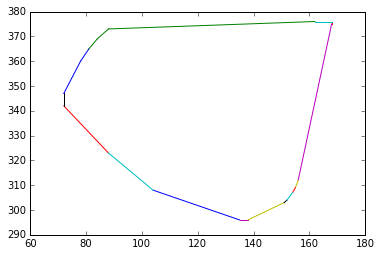

In [418]:
for simplex in hull.simplices:
    plt.plot(hull.points[simplex, 0], hull.points[simplex, 1])

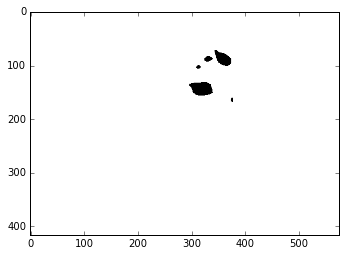

In [410]:
plt.imshow(bool_output[6,0,:,:],cmap='Greys')